# Insper Jr. 

# Análise de Dados para R. Amaral Office
___

##### João Mattar e Livia Carvalho - Grupo 10

In [2]:
import pandas as pd
import os
import math

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from numpy import arange




## LEITURA DA BASE DE DADOS

In [3]:
## print("Esperamos trabalhar no diretório")
print(os.getcwd())



/Users/liviacarvalho/Documents/Insper Junior/Trainee /Analise de dados


In [4]:
filename = 'Base de Dados R. Amaral Office.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')
    

Parece que o arquivo Base de Dados R. Amaral Office.xlsx está na mesma pasta do notebook da avaliação, yay!



In [5]:
# Carregando os dados
df = pd.read_excel(filename)
df.head()

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,4,Domingo,9,2016,6,9,2016,42617,42617,2
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,30,Segunda-feira,5,2016,31,5,2016,42520,42520,1
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,31,Terça-feira,12,2013,7,1,2014,41639,41639,7


## PREPARO DA BASE DE DADOS

In [6]:
type(df)
df.dtypes

id_pedido              int64
nome_cliente          object
modo_envio            object
estado                object
vendas               float64
quantidade             int64
desconto             float64
lucro                float64
segmento              object
região                object
subcategoria          object
categoria             object
dia_pedido             int64
dia_semana_pedido     object
mes_pedido             int64
ano_pedido             int64
dia_envio              int64
mes_envio              int64
ano_envio              int64
data_pedido            int64
mes_ano                int64
tempo_preparacao       int64
dtype: object



## 1. Análise Temporal
#### 1.1 Tendência de vendas ao longo do tempo (dia, semana, mês e ano)

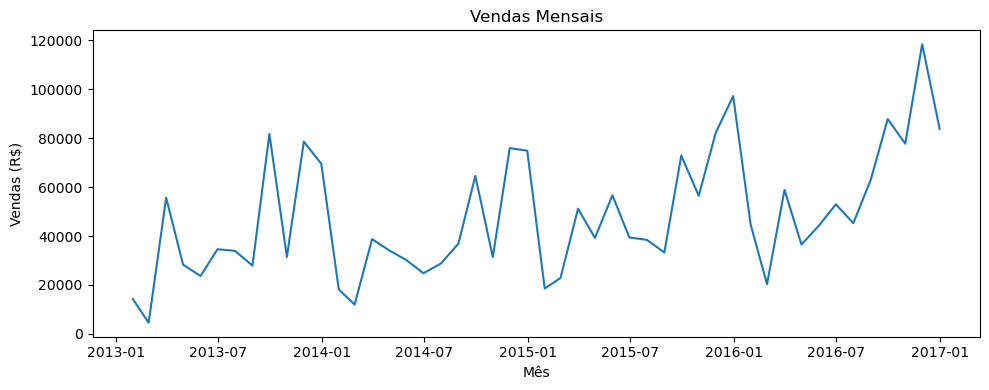

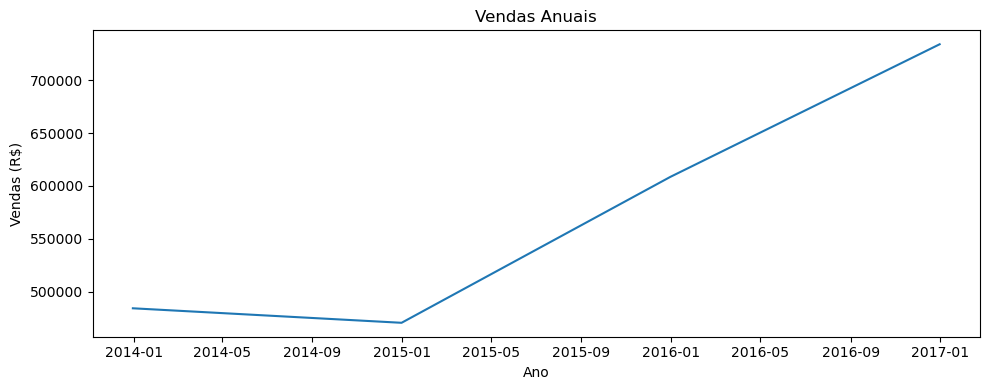

In [10]:
# Criando coluna com dia, mês e ano junto
df['data_pedido'] = pd.to_datetime(
    dict(year=df['ano_pedido'], month=df['mes_pedido'], day=df['dia_pedido'])
)
df = df.set_index('data_pedido').sort_index() #ele pega a coluna pedido_date (que contém datas) e passa a usá-la como índice e  após trocar o índice, esse comando ordena todas as linhas pelo próprio índice (ou seja, pelas datas), garantindo que as observações fiquem em ordem cronológica.

#Separando vendas em diárias, semanais, mensais e anuais
vendas_diarias = df['vendas'].resample('D').sum()
vendas_semanais = df['vendas'].resample('W-MON').sum()
vendas_mensais = df['vendas'].resample('M').sum()
vendas_anuais = df['vendas'].resample('Y').sum()

#Gerando gráfico de cada uma das séries
def plot_series(serie, title, xlabel):
    plt.figure(figsize=(10,4))
    plt.plot(serie.index, serie.values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Vendas (R$)')
    plt.tight_layout()
    plt.show()

# plot_series(vendas_diarias,  'Vendas Diárias',   'Data')
# plot_series(vendas_semanais,  'Vendas Semanais',   'Semana')
plot_series(vendas_mensais,   'Vendas Mensais',    'Mês')
plot_series(vendas_anuais,    'Vendas Anuais',     'Ano')


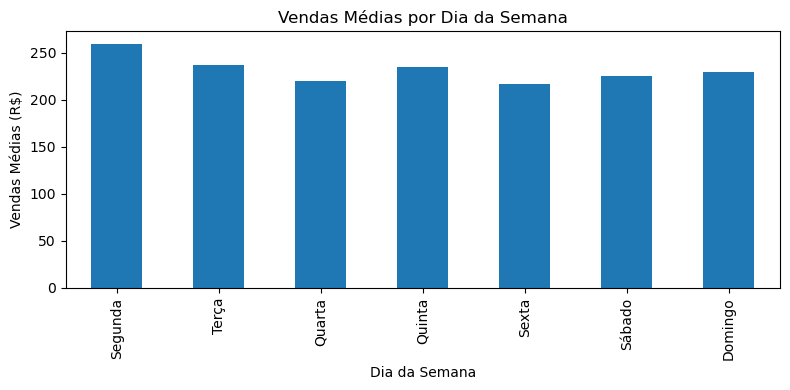

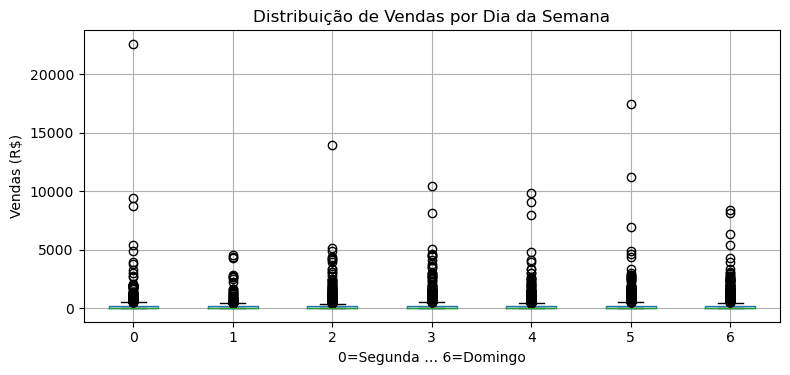

In [13]:
# # Média móvel de 7 e 30 dias para a série diária
# vendas_diarias_7  = vendas_diarias.rolling(window=7, min_periods=1).mean()
# vendas_diarias_30 = vendas_diarias.rolling(window=30, min_periods=1).mean()

# plt.figure(figsize=(10,4))
# plt.plot(vendas_diarias_ma7,  label='MA 7 dias')
# plt.plot(vendas_diarias_ma30, label='MA 30 dias')
# plt.title('Tendência Suavizada das Vendas Diárias')
# plt.xlabel('Data')
# plt.ylabel('Vendas (R$)')
# plt.legend()
# plt.tight_layout()
# plt.show()

# extraindo o dia da semana como número (0=segunda … 6=domingo)
df['weekday'] = df.index.dayofweek

# média de vendas por dia da semana
media_por_dia = df.groupby('weekday')['vendas'].mean()

# renomeando para facilitar leitura
media_por_dia.index = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

# e plot
media_por_dia.plot(kind='bar', figsize=(8,4))
plt.title('Vendas Médias por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas Médias (R$)')
plt.tight_layout()
plt.show()


df.boxplot(column='vendas', by='weekday', figsize=(8,4))
plt.title('Distribuição de Vendas por Dia da Semana')
plt.suptitle('')
plt.xlabel('0=Segunda … 6=Domingo')
plt.ylabel('Vendas (R$)')
plt.tight_layout()
plt.show()


In [16]:
# #Picos sazonais e Quedas
# #Decomposição STL
# from statsmodels.tsa.seasonal import STL

# stl = STL(vendas_mensais, period=12)
# res = stl.fit()
# res.plot()
# plt.show()

In [17]:
# #comparação ano a ano
# tabela_mensal = df['vendas'].groupby(
#     [df.index.year, df.index.month]
# ).sum().unstack(level=0)
# display(tabela_mensal)